In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
import time
from scipy import stats
from pprint import pprint

#import weather API Key
from config import api_key

#Use citipy to find city based on Latitude and Longitude
from citipy import citipy 


# Generate the List of Cities

In [2]:
# generate the list of coordinates used to find cities

#set the desired number of cities
num_cities = 500

#set the lists for latitude and longitude
lat = []
lng = []

#it is possible that duplicate coordinates may be generated, or unique coordinates may lead to duplicate cities.
# this buffer will allow the dataset to drop duplicates while still generating enough coordinates for the search.
coordinate_buffer = 5

lat = np.random.uniform(low=-90.000, high=90.000, size=num_cities*coordinate_buffer)
lng = np.random.uniform(low=-180.000, high=180.000, size=num_cities*coordinate_buffer)

#zip the latitudes and longitudes into a list of tuples to look up values in citipy
coordinates = list(zip(lat, lng))

In [3]:
# generate the list of cities using coordinates
cities = []

#buffer for num_cities in case some cities aren't in the weather database. 
# num_cities will be muliplied by the buffer to ensure there are enough data points even if some cities cannot be found.
buffer = 1.4

#find cities that match coordinates in citipy:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #add to the list of cities only if it is not a duplicate
    if city not in cities:
        cities.append(city)
    
    #stop looking up cities by coordinates if the list is long enough.
    if len(cities) == num_cities*buffer:
        print(f'The list now has {num_cities*buffer} cities:')
        break

The list now has 700.0 cities:


In [4]:
# set url and units for search query

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [5]:

#save the following values for each city: 
# Temperature, % Humidity, % Cloudiness, Wind speed MPH
cityList = []
temp = []
humid = []
cloud = []
wind = []
newlat = []
count = 0

# loop through each city
for city in cities:
    
#     create a search query, make request and store in json
    full_query = query_url + city
    response = requests.get(full_query).json()
    
# check to see if the city is in the database. If not, move on to the next city in the list.
    try: 
        # if there is a match, add the needed information to each list
        newlat.append(response['coord']['lat'])        
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        cityList.append(response['name'])
        count = count + 1
        print(f'{count}. {city} data has been saved.')
        print(full_query)
        if count == num_cities:
            break
#     if there isn't a match, move on to the next city
    except:
        print(f'{city} could not be found. Trying next city')


1. nanortalik data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=nanortalik
2. hobart data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=hobart
3. sirjan data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=sirjan
4. atbasar data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=atbasar
5. hasaki data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=hasaki
6. raudeberg data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=raudeberg
7. bluff data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=bluff

54. barranca data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=barranca
55. waitati data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=waitati
56. mwense data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=mwense
57. pacific grove data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=pacific grove
58. merauke data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=merauke
59. mahajanga data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=mahajanga
60. bowen data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&uni

barentsburg could not be found. Trying next city
109. marabba data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=marabba
110. arraial do cabo data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=arraial do cabo
111. nalut data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=nalut
112. burley data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=burley
113. salym data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=salym
114. atuona data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=atuona
duz could not be found. Trying next city
115. praia da vitoria data has been 

163. ocampo data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ocampo
164. dzerzhinsk data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=dzerzhinsk
165. kaitangata data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=kaitangata
166. litovko data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=litovko
167. murray bridge data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=murray bridge
168. molodizhne data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=molodizhne
169. vestmannaeyjar data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d

217. lorengau data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=lorengau
218. ovsyanka data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ovsyanka
219. kuching data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=kuching
220. oktyabrskiy data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=oktyabrskiy
221. tazovskiy data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=tazovskiy
222. antofagasta data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=antofagasta
223. kununurra data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a64

271. carstairs data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=carstairs
272. geraldton data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=geraldton
273. chokurdakh data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=chokurdakh
274. vao data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=vao
275. blackfoot data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=blackfoot
276. tiarei data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=tiarei
277. ilulissat data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&

327. port augusta data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=port augusta
328. ampanihy data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ampanihy
329. buchanan data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=buchanan
330. san roque data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=san roque
331. krivosheino data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=krivosheino
332. cayenne data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=cayenne
333. kostomuksha data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d36951

381. ginda data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ginda
382. comodoro rivadavia data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=comodoro rivadavia
383. ambon data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ambon
384. navahrudak data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=navahrudak
385. vila velha data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=vila velha
386. yar-sale data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=yar-sale
387. taoudenni data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d36951

437. samana data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=samana
438. gizo data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=gizo
439. aykhal data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=aykhal
440. madinat sittah uktubar data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=madinat sittah uktubar
441. gornopravdinsk data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=gornopravdinsk
442. chapleau data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=chapleau
443. saint anthony data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a

492. khasan data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=khasan
493. kabanjahe data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=kabanjahe
494. zhangjiakou data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=zhangjiakou
alotau could not be found. Trying next city
495. vanavara data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=vanavara
496. ulladulla data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=ulladulla
497. khvoynaya data has been saved.
http://api.openweathermap.org/data/2.5/weather?appid=a3bdd46d369514a645a76f79a848719f&units=imperial&q=khvoynaya
gardan diwal could not be found. Trying next city
498. anadyr data

In [6]:
# #create a data frame from cities, temp, humid, cloud, and wind
weatherInfoDict = {
    "City":cityList,
    "Latitude":newlat,
    "Temperature (F)":temp,
    "% Humidity":humid,
    "% Cloud Cover":cloud,
    "Wind Speed (MPH)":wind
}

weatherDF = pd.DataFrame(weatherInfoDict)
weatherDF.head()

,City,Latitude,Temperature (F),% Humidity,% Cloud Cover,Wind Speed (MPH)
0,Nanortalik,60.14,45.63,92,100,10.51
1,Hobart,-42.88,41.31,75,75,10.29
2,Sīrjān,29.45,75.45,41,0,5.91
3,Atbasar,51.80,61.29,94,36,5.48
4,Hasaki,35.73,76.46,88,75,3.36


# Linear Regression Function

In [7]:
#optional: create a function that writes linear regression plots
def linRegressFunc(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    #create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    #create line equation and annotate
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    
    #calculate and print r squared to determine strength of correlation
    print(f'The r-squared is: {rvalue**2}')

# Temperature vs. Latitude

The r-squared is: 0.000254068775278184


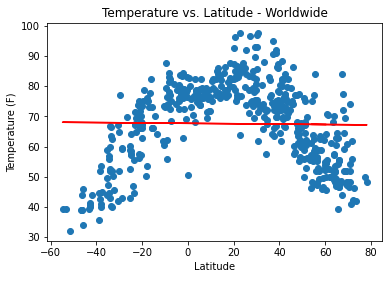

<Figure size 432x288 with 0 Axes>

In [8]:
#First plot - Temperature vs. Latitude
linRegressFunc(weatherDF["Latitude"], weatherDF['Temperature (F)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Worldwide")
plt.show()

#save chart as png
plt.savefig("images/Temp_vs_Lat_All.png")

The r-squared is: 0.529756298666983


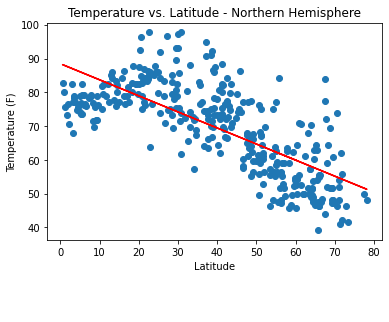

In [9]:
#Northern Hemisphere - Temperature vs. latitude

#filter for values in the northern hemisphere
northDF = weatherDF.loc[weatherDF["Latitude"] > 0]

linRegressFunc(northDF["Latitude"], northDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Northern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_North.png")

The r-squared is: 0.6825786244224189


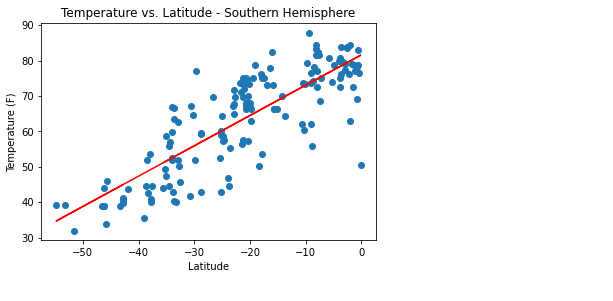

In [10]:
#Southern Hemisphere - Temperature vs. latitude

#filter for values in the southern hemisphere
southDF = weatherDF.loc[weatherDF["Latitude"] < 0]

linRegressFunc(southDF["Latitude"], southDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Southern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_South.png")

# % Humidity vs. Latitude

The r-squared is: 0.0002693701877673846


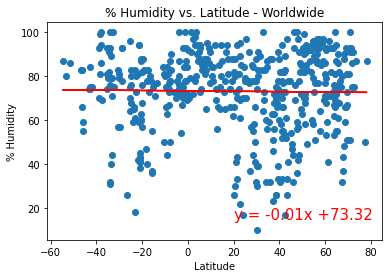

In [11]:
#Second plot - Humidity (%) vs. Latitude

#call the linear regresssion plot function
linRegressFunc(weatherDF["Latitude"], weatherDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Humid_vs_Lat_All.png")

The r-squared is: 0.001609715564200749


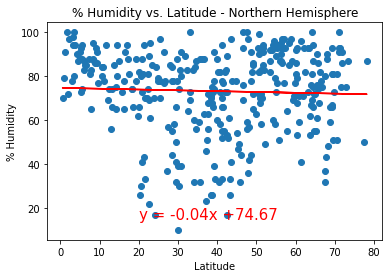

In [12]:
# Humidity (%) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_North.png")

The r-squared is: 0.0006184318319104257


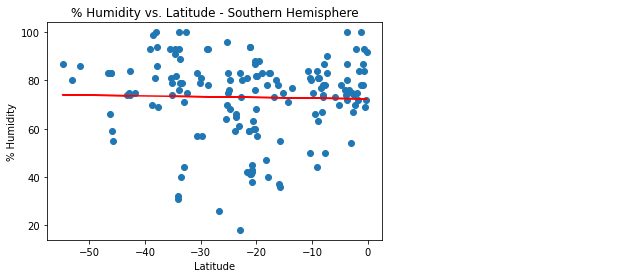

In [13]:
# Humidity (%) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_South.png")

# Cloudiness (%) vs. Latitude

The r-squared is: 0.010014388067975947


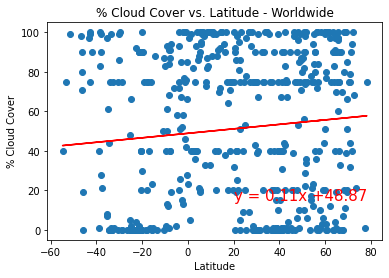

<Figure size 432x288 with 0 Axes>

In [14]:
#Third plot - Cloudiness (%) vs. Latitude

#call the linear regresssion plot function
linRegressFunc(weatherDF["Latitude"], weatherDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Worldwide")
plt.show()

#save chart as png
plt.savefig("images/Cloud_vs_Lat_All.png")

The r-squared is: 0.006914524687763323


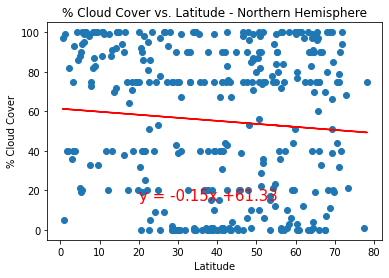

<Figure size 432x288 with 0 Axes>

In [15]:
# Cloudiness (%) vs. Latitude - Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Northern Hemisphere")
plt.show()

#save chart as png
plt.savefig("images/Cloud_vs_Lat_North.png")

The r-squared is: 0.002164908220193222


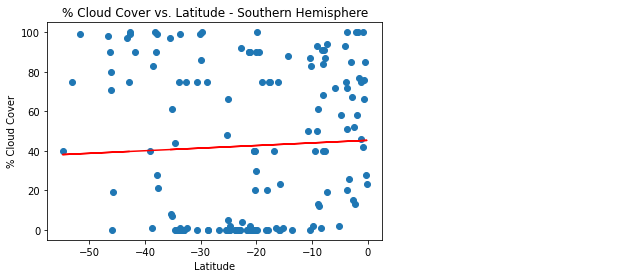

<Figure size 432x288 with 0 Axes>

In [16]:
# Cloudiness (%) vs. Latitude - Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Southern Hemisphere")
plt.show()

#save chart as png
plt.savefig("images/Cloud_vs_Lat_South.png")

# Wind Speed vs. Latitude

The r-squared is: 0.0034633568926432817


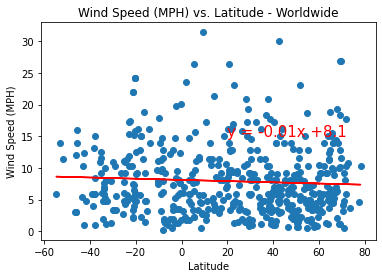

<Figure size 432x288 with 0 Axes>

In [17]:
#Fourth Plot - Wind Speed (mph) vs. Latitude

#call the linear regresssion plot function
linRegressFunc(weatherDF["Latitude"], weatherDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Worldwide")
plt.show()

#save chart as png
plt.savefig("images/Wind_vs_Lat_All.png")


The r-squared is: 0.0017539703631014787


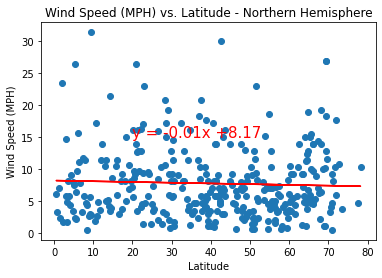

<Figure size 432x288 with 0 Axes>

In [18]:
# Wind Speed (mph) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Northern Hemisphere")
plt.show()

#save chart as png
plt.savefig("images/Wind_vs_Lat_North.png")

The r-squared is: 1.590519827065895e-05


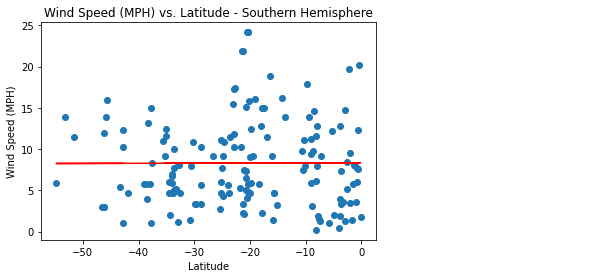

<Figure size 432x288 with 0 Axes>

In [19]:
# Wind Speed (mph) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Southern Hemisphere")
plt.show()

#save chart as png
plt.savefig("images/Wind_vs_Lat_South.png")

In [20]:
#save all data in a CSV
weatherDF.to_csv('../data/weather_data.csv', encoding='utf-8', index=False)